## Metrics



In [1]:
!pip install rouge

In [9]:
from sklearn.metrics import f1_score
from rouge import Rouge
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
references = pd.read_csv('cleaned_references.csv')
candidates = pd.read_csv('cleaned_candidates.csv')


In [6]:
rouge = Rouge()

# Initialize metrics storage
rouge_scores = []
bleu_scores = []
f1_scores = []
em_scores = []

In [7]:
# Iterate through aligned references and candidates
for ref, cand in zip(references['reference'], candidates['candidate']):
    # ROUGE Score
    try:
        rouge_score = rouge.get_scores(cand, ref)
        rouge_scores.append(rouge_score[0]['rouge-l']['f'])
    except ValueError:
        rouge_scores.append(0.0)

    # BLEU Score
    bleu_score = nltk.translate.bleu_score.sentence_bleu([ref.split()], cand.split())
    bleu_scores.append(bleu_score)

    # F1 Score
    ref_tokens = set(ref.split())
    cand_tokens = set(cand.split())
    common_tokens = ref_tokens & cand_tokens
    precision = len(common_tokens) / len(cand_tokens) if cand_tokens else 0
    recall = len(common_tokens) / len(ref_tokens) if ref_tokens else 0
    f1 = (2 * precision * recall) / (precision + recall) if precision + recall > 0 else 0
    f1_scores.append(f1)

    # Exact Match (EM)
    em = 1 if ref.strip() == cand.strip() else 0  # Strip for strict comparison
    em_scores.append(em)

# Compute average scores
average_rouge = np.mean(rouge_scores) if rouge_scores else 0
average_bleu = np.mean(bleu_scores) if bleu_scores else 0
average_f1 = np.mean(f1_scores) if f1_scores else 0
average_em = np.mean(em_scores) if em_scores else 0

# Display results
results = {
    "Average ROUGE-L": average_rouge,
    "Average BLEU": average_bleu,
    "Average F1": average_f1,
    "Average Exact Match": average_em,
}

print(results)

{'Average ROUGE-L': 0.2820764658229399, 'Average BLEU': 0.11949374005530339, 'Average F1': 0.29524522923575747, 'Average Exact Match': 0.0}


/Users/aryanphilip/mambaforge/envs/DSC253/lib/python3.9/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/Users/aryanphilip/mambaforge/envs/DSC253/lib/python3.9/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/Users/aryanphilip/mambaforge/envs/DSC253/lib/python3.9/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order i

In [11]:
rouge = Rouge()

# Initialize metrics storage
rouge_scores = []
bleu_scores = []
f1_scores = []
precision_scores = []
recall_scores = []
diversity_scores = []
fluency_scores = []

# Helper function to calculate diversity
def calculate_diversity(text):
    tokens = text.split()
    if len(tokens) == 0:
        return 0
    unique_tokens = len(set(tokens))
    return unique_tokens / len(tokens)

# Iterate through aligned references and candidates
for ref, cand in zip(references['reference'], candidates['candidate']):
    # ROUGE Score
    try:
        rouge_score = rouge.get_scores(cand, ref)
        rouge_scores.append(rouge_score[0]['rouge-l']['f'])
    except ValueError:
        rouge_scores.append(0.0)

    # BLEU Score
    bleu_score = nltk.translate.bleu_score.sentence_bleu([ref.split()], cand.split())
    bleu_scores.append(bleu_score)

    # F1, Precision, and Recall Scores
    ref_tokens = set(ref.split())
    cand_tokens = set(cand.split())
    common_tokens = ref_tokens & cand_tokens
    precision = len(common_tokens) / len(cand_tokens) if cand_tokens else 0
    recall = len(common_tokens) / len(ref_tokens) if ref_tokens else 0
    f1 = (2 * precision * recall) / (precision + recall) if precision + recall > 0 else 0

    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    # Diversity
    diversity = calculate_diversity(cand)
    diversity_scores.append(diversity)

    # Fluency (Sentence-Level BLEU)
    fluency_scores.append(bleu_score)

# Compute average scores
average_rouge = np.mean(rouge_scores) if rouge_scores else 0
average_bleu = np.mean(bleu_scores) if bleu_scores else 0
average_f1 = np.mean(f1_scores) if f1_scores else 0
average_precision = np.mean(precision_scores) if precision_scores else 0
average_recall = np.mean(recall_scores) if recall_scores else 0
average_diversity = np.mean(diversity_scores) if diversity_scores else 0
average_fluency = np.mean(fluency_scores) if fluency_scores else 0

# Results
results = {
    "ROUGE-L": average_rouge,
    "BLEU": average_bleu,
    "F1": average_f1,
    "Precision": average_precision,
    "Recall": average_recall,
    "Diversity": average_diversity,
    "Fluency": average_fluency,
}

print(results)

# Visualization
# Plot 1: Average Metrics
metrics = ["ROUGE-L", "BLEU", "F1", "Precision", "Recall", "Diversity", "Fluency"]
scores = [average_rouge, average_bleu, average_f1, average_precision, average_recall, average_diversity, average_fluency]

{'ROUGE-L': 0.2820764658229399, 'BLEU': 0.11949374005530339, 'F1': 0.29524522923575747, 'Precision': 0.30428640689680725, 'Recall': 0.3357134944689515, 'Diversity': 0.9258504012629, 'Fluency': 0.11949374005530339}


/Users/aryanphilip/mambaforge/envs/DSC253/lib/python3.9/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/Users/aryanphilip/mambaforge/envs/DSC253/lib/python3.9/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/Users/aryanphilip/mambaforge/envs/DSC253/lib/python3.9/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order i

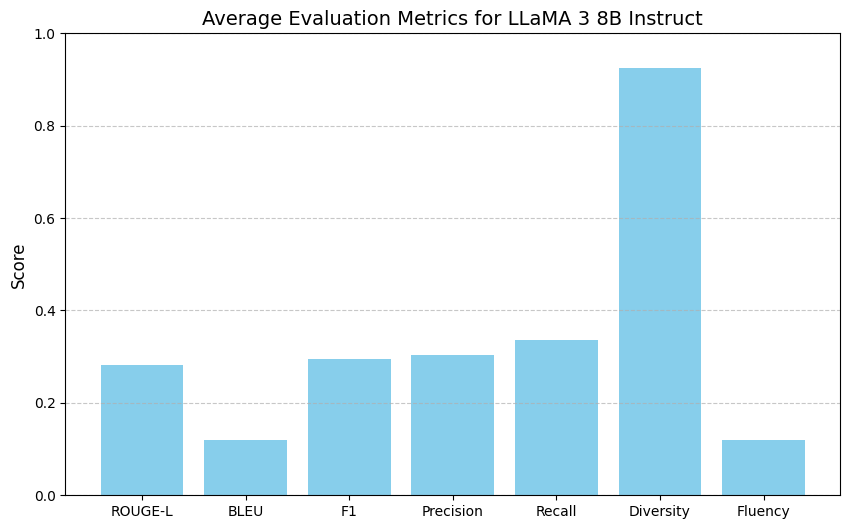

In [12]:
import matplotlib.pyplot as plt

# Plot 1: Average Metrics
metrics = ["ROUGE-L", "BLEU", "F1", "Precision", "Recall", "Diversity", "Fluency"]
scores = [average_rouge, average_bleu, average_f1, average_precision, average_recall, average_diversity, average_fluency]

plt.figure(figsize=(10, 6))
plt.bar(metrics, scores, color="skyblue")
plt.title("Average Evaluation Metrics for LLaMA 3 8B Instruct", fontsize=14)
plt.ylabel("Score", fontsize=12)
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.savefig("llama_average_metrics.png", dpi=300)
plt.show()

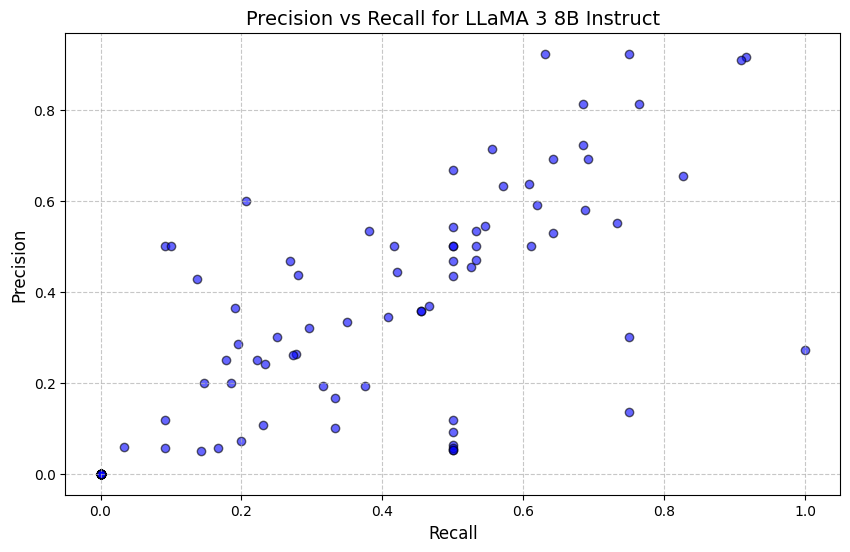

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(recall_scores, precision_scores, c='blue', alpha=0.6, edgecolors='k')
plt.title("Precision vs Recall for LLaMA 3 8B Instruct", fontsize=14)
plt.xlabel("Recall", fontsize=12)
plt.ylabel("Precision", fontsize=12)
plt.grid(linestyle="--", alpha=0.7)
plt.savefig("llama_precision_vs_recall.png", dpi=300)
plt.show()

/var/folders/ds/bksqkp9j38l5cq4g6n32q5l80000gn/T/ipykernel_10240/1122632408.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([rouge_scores, bleu_scores, f1_scores, precision_scores, recall_scores, diversity_scores, fluency_scores],


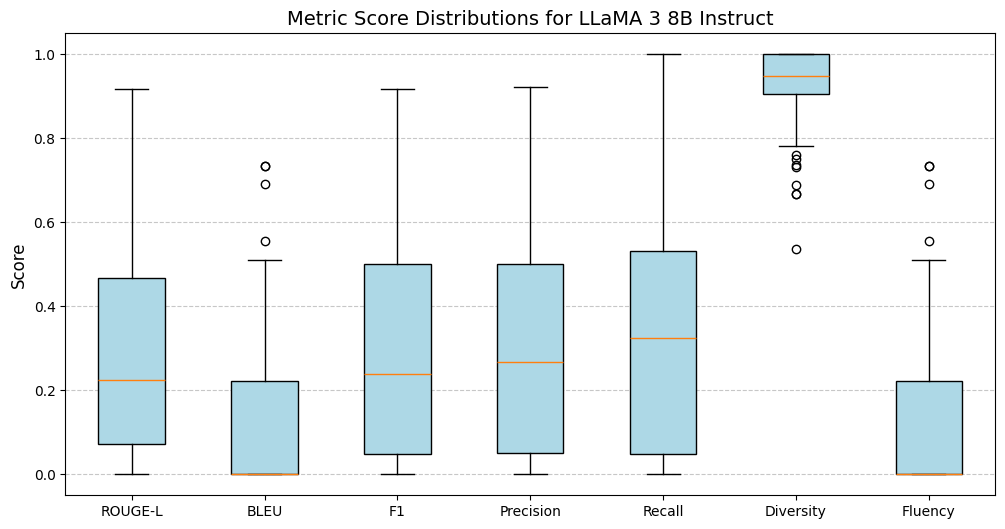

In [16]:
# Plot Metric Distributions
plt.figure(figsize=(12, 6))
plt.boxplot([rouge_scores, bleu_scores, f1_scores, precision_scores, recall_scores, diversity_scores, fluency_scores],
            labels=metrics, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Metric Score Distributions for LLaMA 3 8B Instruct", fontsize=14)
plt.ylabel("Score", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.savefig("llama_metric_distributions.png", dpi=300)
plt.show()

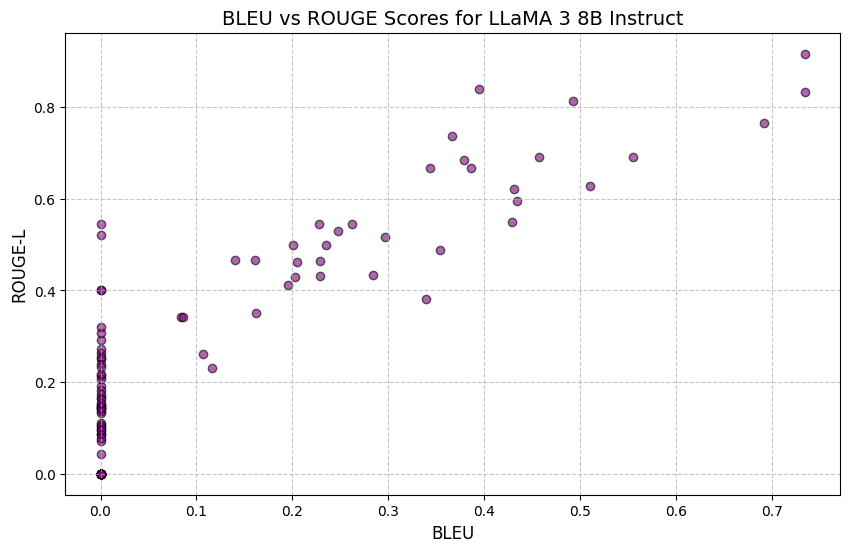

In [17]:
# BLEU vs ROUGE Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(bleu_scores, rouge_scores, c='purple', alpha=0.6, edgecolors='k')
plt.title("BLEU vs ROUGE Scores for LLaMA 3 8B Instruct", fontsize=14)
plt.xlabel("BLEU", fontsize=12)
plt.ylabel("ROUGE-L", fontsize=12)
plt.grid(linestyle="--", alpha=0.7)
plt.savefig("bleu_vs_rouge_scatter.png", dpi=300)
plt.show()